Logistic Regression Accuracy: 1.0000


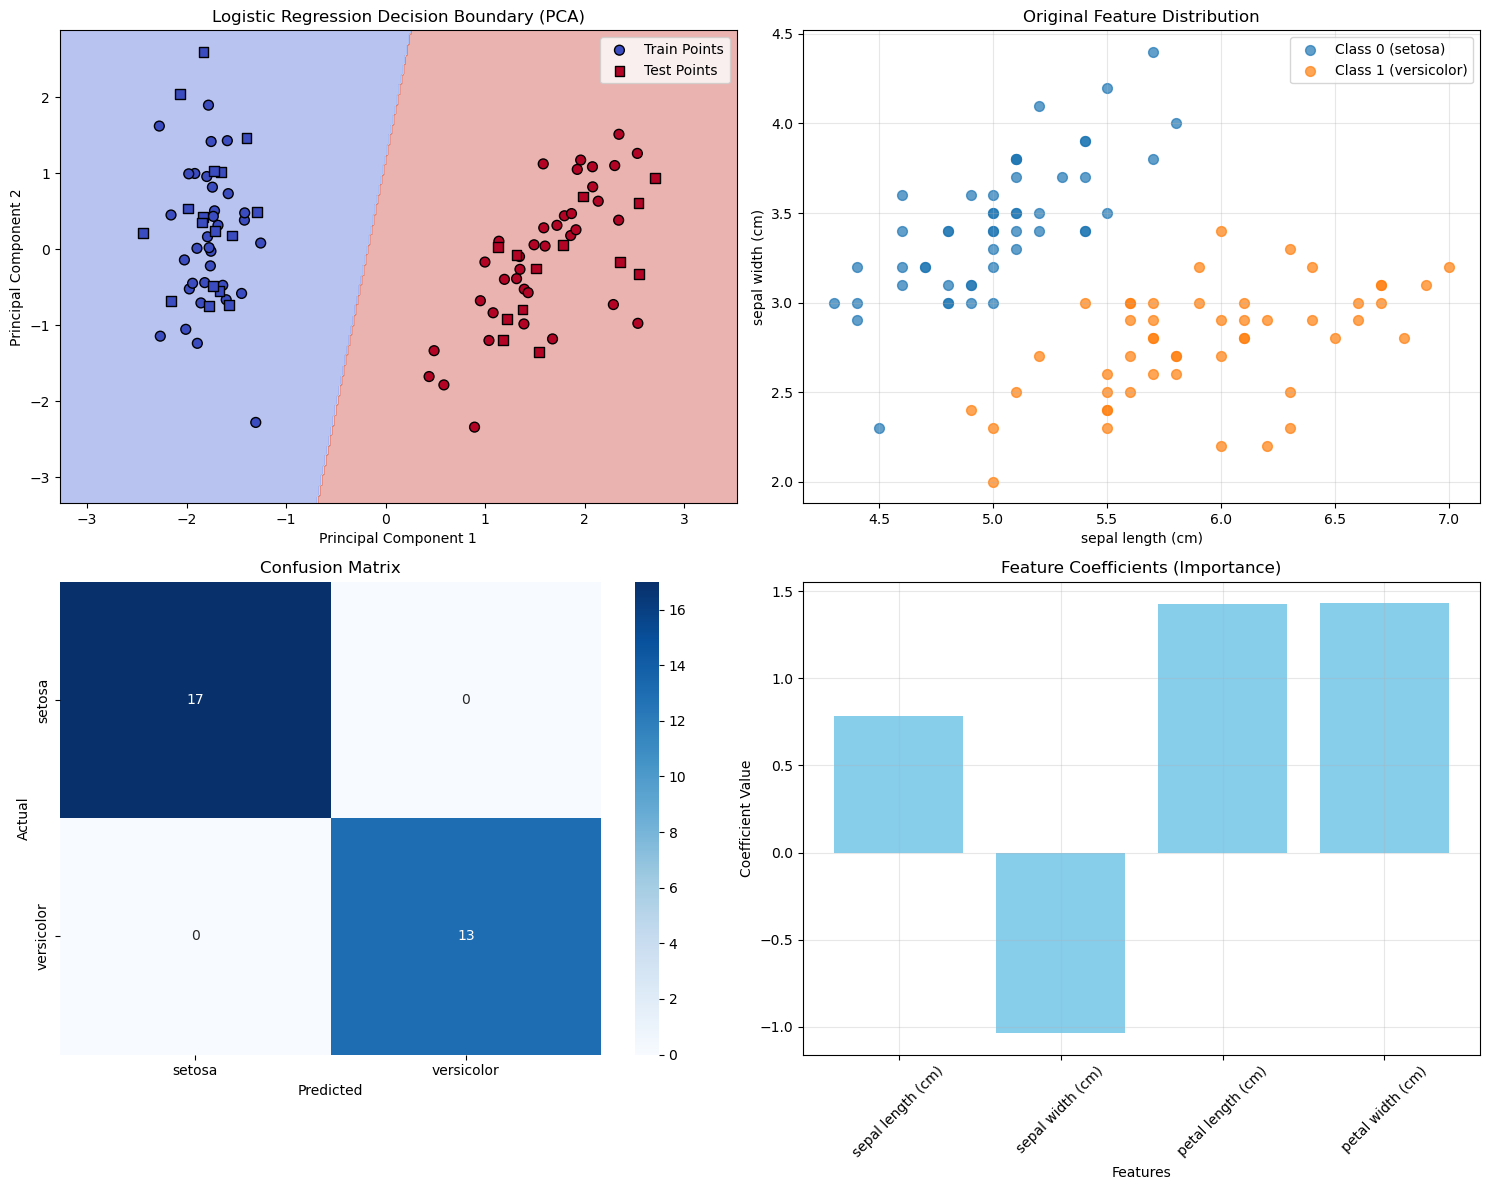


LOGISTIC REGRESSION RESULTS
Original 4D Model Accuracy: 1.0000
PCA 2D Model Accuracy: 1.0000
Number of training samples: 70
Number of testing samples: 30

Original Model Coefficients:
  sepal length (cm): 0.7856
  sepal width (cm): -1.0351
  petal length (cm): 1.4255
  petal width (cm): 1.4308
Intercept: 0.4215

PCA explained variance ratio: [0.74953485 0.21258675]
Total variance explained: 0.9621

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load a sample dataset (Iris dataset in this case)
data = load_iris()
X = data.data
y = data.target

# For binary classification, let's filter out one class (e.g., class 2) for simplicity
X_binary = X[y != 2]  # Only use classes 0 and 1
y_binary = y[y != 2]  # Corresponding labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model on full 4D data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Perform PCA to reduce the data to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a separate logistic regression model on PCA-transformed data for visualization
logreg_pca = LogisticRegression(random_state=42)
logreg_pca.fit(X_train_pca, y_train)

# Create a meshgrid for plotting decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for each point on the meshgrid using PCA model
Z = logreg_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create subplots for better visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Decision Boundary with PCA data
axes[0, 0].contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
scatter_train = axes[0, 0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
                                   edgecolors='k', marker='o', cmap='coolwarm', s=50, label="Train Points")
scatter_test = axes[0, 0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, 
                                  edgecolors='k', marker='s', cmap='coolwarm', s=50, label="Test Points")
axes[0, 0].set_title('Logistic Regression Decision Boundary (PCA)')
axes[0, 0].set_xlabel('Principal Component 1')
axes[0, 0].set_ylabel('Principal Component 2')
axes[0, 0].legend()

# Plot 2: Feature distribution (original features)
feature_names = data.feature_names
for i, class_label in enumerate([0, 1]):
    mask = y_binary == class_label
    axes[0, 1].scatter(X_binary[mask, 0], X_binary[mask, 1], 
                      label=f'Class {class_label} ({data.target_names[class_label]})', 
                      alpha=0.7, s=50)
axes[0, 1].set_xlabel(feature_names[0])
axes[0, 1].set_ylabel(feature_names[1])
axes[0, 1].set_title('Original Feature Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=[data.target_names[0], data.target_names[1]], 
            yticklabels=[data.target_names[0], data.target_names[1]])
axes[1, 0].set_title('Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Plot 4: Feature Coefficients
coefficients = logreg.coef_[0]
axes[1, 1].bar(range(len(coefficients)), coefficients, color='skyblue')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Coefficient Value')
axes[1, 1].set_title('Feature Coefficients (Importance)')
axes[1, 1].set_xticks(range(len(feature_names)))
axes[1, 1].set_xticklabels(feature_names, rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed results
print("\n" + "="*60)
print("LOGISTIC REGRESSION RESULTS")
print("="*60)
print(f"Original 4D Model Accuracy: {accuracy:.4f}")
print(f"PCA 2D Model Accuracy: {logreg_pca.score(X_test_pca, y_test):.4f}")
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

print("\nOriginal Model Coefficients:")
for i, coef in enumerate(logreg.coef_[0]):
    print(f"  {feature_names[i]}: {coef:.4f}")
print(f"Intercept: {logreg.intercept_[0]:.4f}")

print(f"\nPCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[data.target_names[0], data.target_names[1]]))

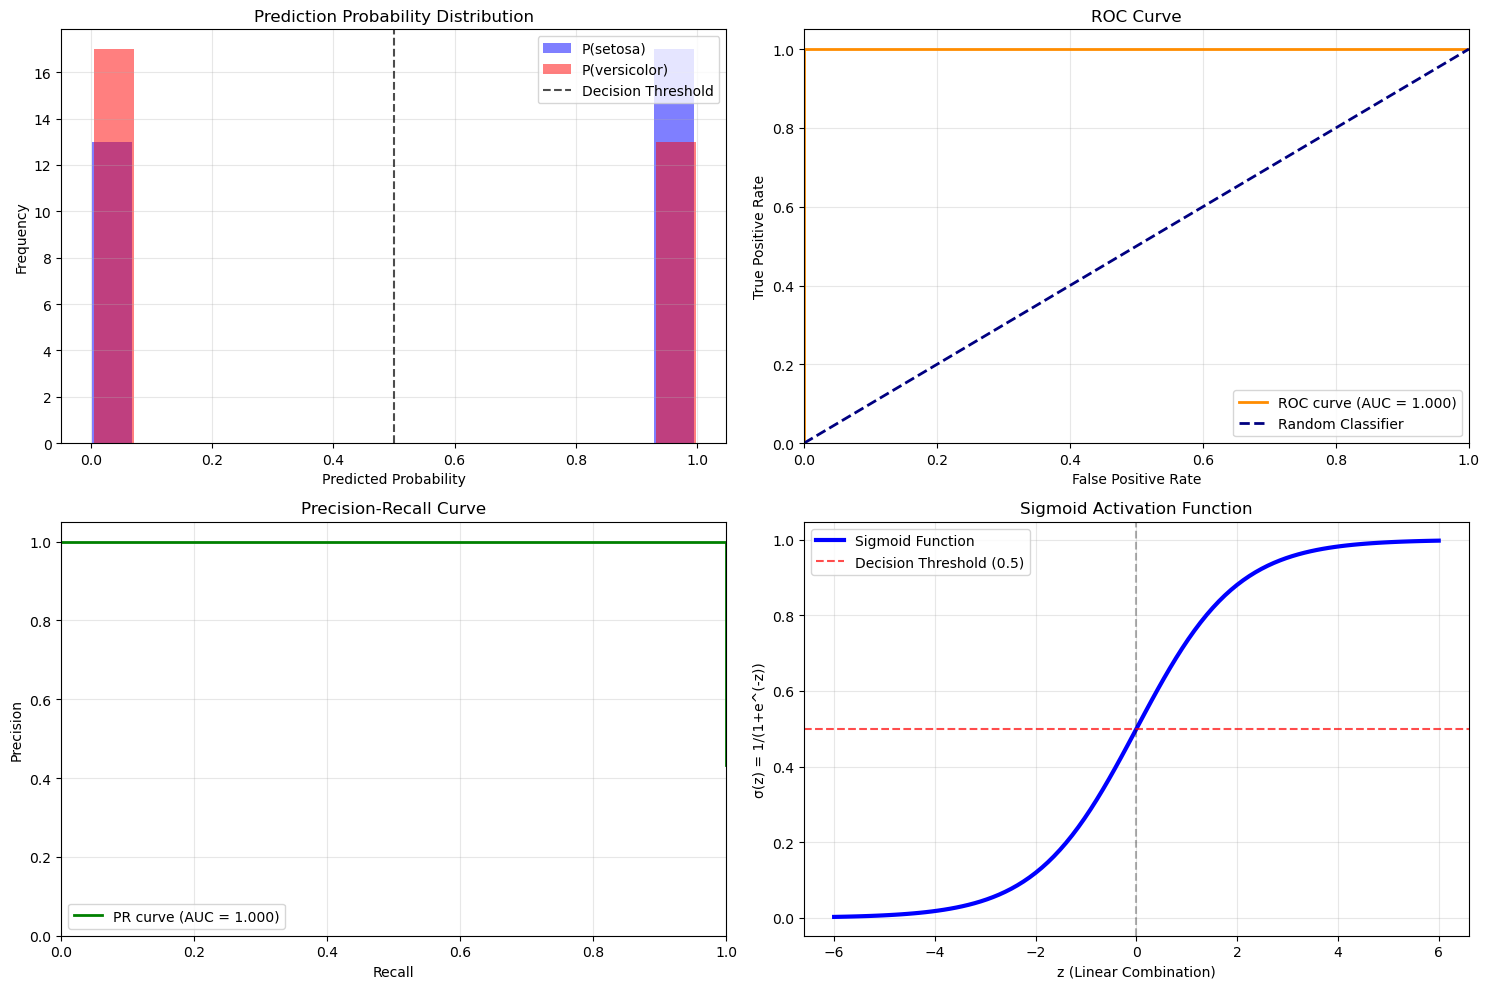


PROBABILITY ANALYSIS FOR TEST SAMPLES
Sample  Actual      Predicted   P(Class 0)  P(Class 1)  Confidence  
------------------------------------------------------------------------
1       versicolor  versicolor  0.002       0.998       0.998       
2       versicolor  versicolor  0.010       0.990       0.990       
3       versicolor  versicolor  0.006       0.994       0.994       
4       setosa      setosa      0.955       0.045       0.955       
5       setosa      setosa      0.977       0.023       0.977       
6       setosa      setosa      0.977       0.023       0.977       
7       setosa      setosa      0.995       0.005       0.995       
8       versicolor  versicolor  0.026       0.974       0.974       
9       setosa      setosa      0.984       0.016       0.984       
10      setosa      setosa      0.984       0.016       0.984       
11      setosa      setosa      0.971       0.029       0.971       
12      setosa      setosa      0.966       0.034       0.96

In [5]:
# Advanced Analysis: Probability Visualization and Model Performance
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Create probability-based visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Prediction Probabilities
y_prob = logreg.predict_proba(X_test_scaled)
axes[0, 0].hist(y_prob[:, 0], alpha=0.5, label=f'P({data.target_names[0]})', bins=15, color='blue')
axes[0, 0].hist(y_prob[:, 1], alpha=0.5, label=f'P({data.target_names[1]})', bins=15, color='red')
axes[0, 0].axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Decision Threshold')
axes[0, 0].set_xlabel('Predicted Probability')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Prediction Probability Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. ROC Curve
y_prob_class1 = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_class1)
roc_auc = auc(fpr, tpr)

axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend(loc="lower right")
axes[0, 1].grid(True, alpha=0.3)

# 3. Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob_class1)
pr_auc = auc(recall, precision)

axes[1, 0].plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
axes[1, 0].set_xlim([0.0, 1.0])
axes[1, 0].set_ylim([0.0, 1.05])
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend(loc="lower left")
axes[1, 0].grid(True, alpha=0.3)

# 4. Sigmoid Function Visualization
z_range = np.linspace(-6, 6, 100)
sigmoid = 1 / (1 + np.exp(-z_range))
axes[1, 1].plot(z_range, sigmoid, 'b-', linewidth=3, label='Sigmoid Function')
axes[1, 1].axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
axes[1, 1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[1, 1].set_xlabel('z (Linear Combination)')
axes[1, 1].set_ylabel('σ(z) = 1/(1+e^(-z))')
axes[1, 1].set_title('Sigmoid Activation Function')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed probability analysis for test samples
print("\n" + "="*60)
print("PROBABILITY ANALYSIS FOR TEST SAMPLES")
print("="*60)
print(f"{'Sample':<8}{'Actual':<12}{'Predicted':<12}{'P(Class 0)':<12}{'P(Class 1)':<12}{'Confidence':<12}")
print("-" * 72)

for i in range(min(15, len(X_test))):
    proba = logreg.predict_proba(X_test_scaled[i:i+1])[0]
    pred = logreg.predict(X_test_scaled[i:i+1])[0]
    actual = y_test[i]
    confidence = max(proba)
    
    actual_name = data.target_names[actual]
    pred_name = data.target_names[pred]
    
    print(f"{i+1:<8}{actual_name:<12}{pred_name:<12}{proba[0]:<12.3f}{proba[1]:<12.3f}{confidence:<12.3f}")

# Model interpretation
print(f"\n" + "="*60)
print("MODEL INTERPRETATION")
print("="*60)
print("Feature Importance (based on absolute coefficient values):")
feature_importance = np.abs(logreg.coef_[0])
sorted_idx = np.argsort(feature_importance)[::-1]

for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {feature_names[idx]}: {feature_importance[idx]:.4f}")

print(f"\nModel Performance Metrics:")
print(f"  - Accuracy: {accuracy:.4f}")
print(f"  - ROC AUC: {roc_auc:.4f}")
print(f"  - PR AUC: {pr_auc:.4f}")
print(f"  - Average Prediction Confidence: {np.mean(np.max(y_prob, axis=1)):.4f}")

# Decision boundary explanation
print(f"\nDecision Boundary Equation:")
print(f"z = {logreg.intercept_[0]:.4f}", end="")
for i, coef in enumerate(logreg.coef_[0]):
    sign = "+" if coef >= 0 else ""
    print(f" {sign}{coef:.4f}×{feature_names[i]}", end="")
print(f"\nPrediction: Class 1 if σ(z) > 0.5, else Class 0")